In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
import geopandas as gpd


In [2]:
dfSuicide = pd.read_csv('cleanData.csv')
dfDDTerr = pd.read_csv('DST.csv')
usaOnly = dfSuicide[dfSuicide['country']=='United States']
data = dfSuicide.copy()


In [63]:
dfDDTerr.tail()

,Unnamed: 0,year,nkill,terrtotal,suicides,ddfat
44,45,2014,26,45,42826.0,9943.0
45,46,2015,54,112,44193.0,10320.0
46,47,2016,68,211,44965.0,10497.0
47,48,2017,97,1043,47173.0,10908.0
48,49,2018,45,106,48344.0,10511.0


In [3]:
#y = masterCat['suicides/100kpop']
y = dfSuicide['suicides_no']

# set Y 
#x1=masterCat[['gdp_per_capita']]
#x1=masterCat[['population','sex','generation']]
#x1=masterCat[['sex','generation','gdp_per_capita']]
x1=dfSuicide[['sex','generation','popNorma','age']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     4963.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:21:49   Log-Likelihood:            -2.2129e+05
No. Observations:               27820   AIC:                         4.426e+05
Df Residuals:                   27815   BIC:                         4.426e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.1720     45.283      4.398      0.000     110.416     287.928
sex         -273.5972      8.264    -33.109      0.000    -289.794    -257.400
generation    -5.0043      7.031     -0.712      0.477     -18.786       8.777
popNorma    6313.8588     46.357    136.200      0.000    6222.996    6404.721
age           58.4853      5.860      9.980      0.000      46.999      69.971
==============================================================================
Omnibus:                    44650.190   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52163976.084
Skew:                          10.302   Prob(JB):                         0.00
Kurtosis:                     214.132   Cond. No.                         59.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#new_df = pd.DataFrame({'constant':1,'generation':[1,2,3,6], 'gdp_per_capita':[5000,789,5000,6000],'population':[300000000, 312900, 1200, 1200]})
#new_df = pd.DataFrame({'constant':1,'population':[300000000, 312900, 1200, 1200],'sex':[1,2,1,1],'generation':[1,4,6,4]})
#new_df = pd.DataFrame({'constant':1,'sex':[1,2,1,1],'generation':[1,4,6,4],'gdp_per_capita':[1222,789,5000,6000]})
new_df = pd.DataFrame({'constant':1,'age':[1,4,6,5],'sex':[1,2,1,2],'generation':[1,1,6,6],'popNorma':[0.906256,0.003256,0.066256,0.036256]})
new_df['suicides'] = results.predict(new_df)
new_df

,constant,age,sex,generation,popNorma,suicides
0,1,1,1,1,0.906256,6287.432007
1,1,4,2,1,0.003256,5408.824058
2,1,6,1,6,0.066256,36439.612413
3,1,5,2,6,0.036256,36706.450746


<AxesSubplot: xlabel='gdp_per_capita', ylabel='suicides/100kpop'>

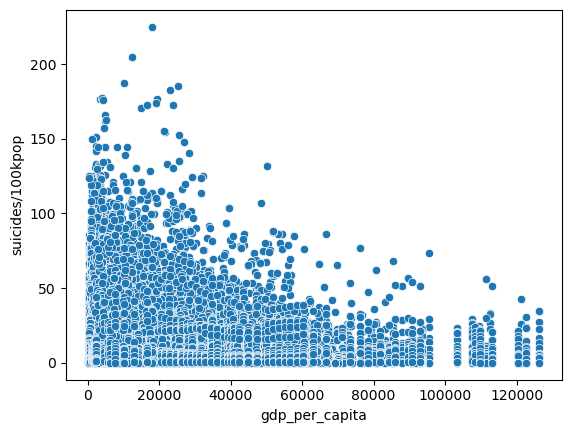

In [70]:
sns.scatterplot(x="gdp_per_capita", y="suicides/100kpop", data=dfSuicide)


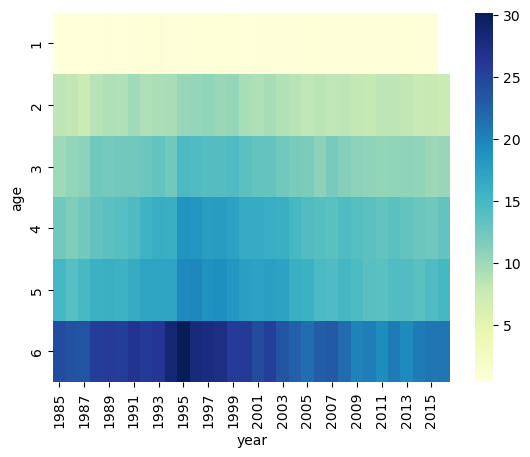

In [6]:
suicide_data_heatmap = dfSuicide.pivot_table(index="age", columns="year", values="suicides/100kpop", aggfunc="mean")
sns.heatmap(suicide_data_heatmap, cmap="YlGnBu")
plt.show()

<AxesSubplot: xlabel='generation', ylabel='suicides_no'>

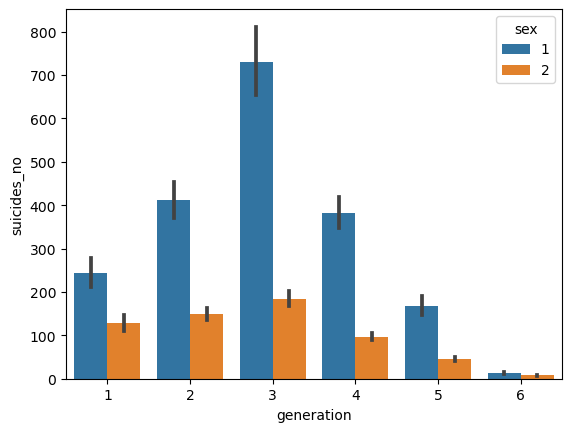

In [38]:
#sns.barplot(x="generation", y="suicides_no", data=dfSuicide)
sns.barplot(x="generation", y="suicides_no",hue='sex', data=dfSuicide)


C:\Users\abdul\AppData\Local\Temp\ipykernel_18132\563418652.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="percapita",ci=None, data=dfSuicide)


<AxesSubplot: xlabel='year', ylabel='percapita'>

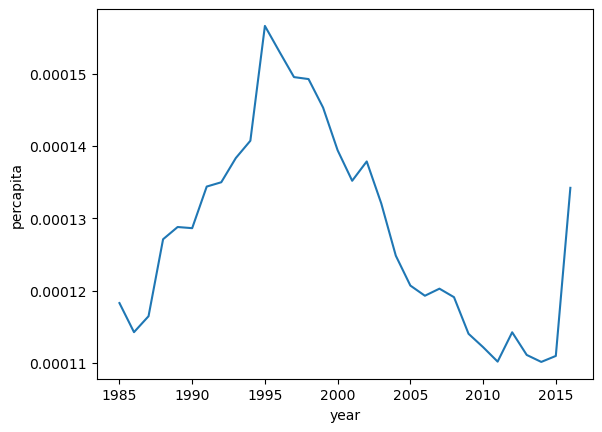

In [69]:
sns.lineplot(x="year", y="percapita",ci=None, data=dfSuicide)


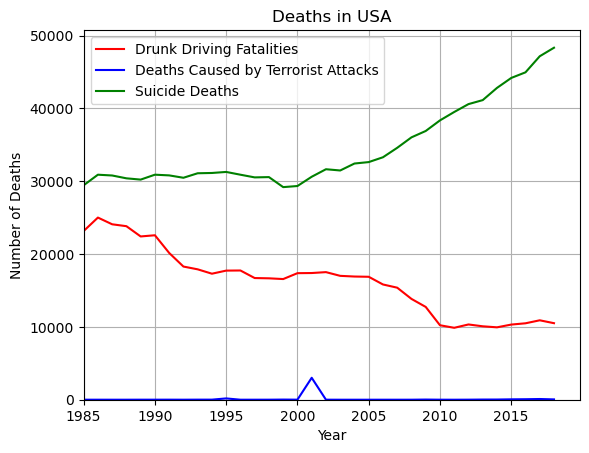

In [64]:
fig, ax = plt.subplots()
usalimited = dfDDTerr[dfDDTerr['year'] >= 1982]
sns.lineplot(x="year", y="ddfat", data=usalimited, ax=ax, color='red', label='Drunk Driving Fatalities')
sns.lineplot(x="year", y="nkill", data=usalimited, ax=ax, color='blue', label='Deaths Caused by Terrorist Attacks')
sns.lineplot(x="year", y="suicides", data=usalimited, ax=ax, color='green', label='Suicide Deaths')

ax.set_title('Deaths in USA')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.grid()
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)
# Show the legend
ax.legend()
ax
# Show the plot
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_18132\3914599624.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
C:\Users\abdul\AppData\Local\Temp\ipykernel_18132\3914599624.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()


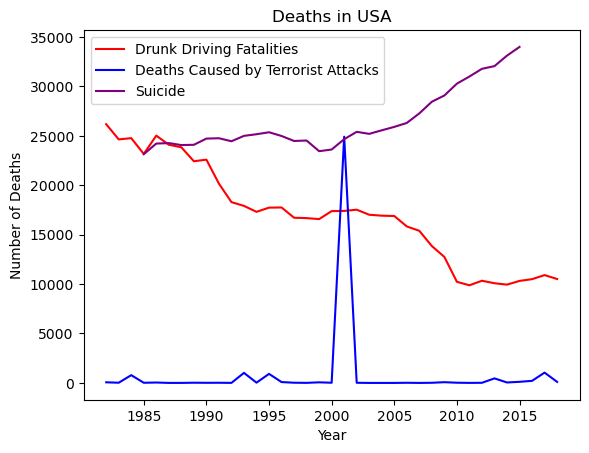

In [10]:
fig, ax = plt.subplots()
test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()

sns.lineplot(x="year", y="ddfat", data=usalimited, ax=ax, color='red', label='Drunk Driving Fatalities')
sns.lineplot(x="year", y="terrtotal", data=usalimited, ax=ax, color='blue', label='Deaths Caused by Terrorist Attacks')
#sns.lineplot(x="year", y="suicides", data=usalimited, ax=ax, color='green', label='Suicide Deaths')
sns.lineplot(x="year", y="suicides_no", data=test,ax=ax,color='purple',label='Suicide')

ax.set_title('Deaths in USA')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')

# Show the legend
ax.legend()

# Show the plot
plt.show()

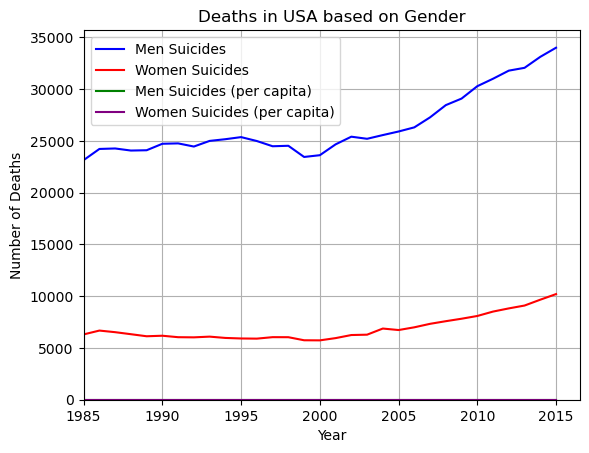

In [16]:
fig, ax = plt.subplots()
#test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
#testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()

sns.lineplot(x="year", y="suicides_no", data=test, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="suicides_no", data=testWomen,ax=ax,color='red',label='Women Suicides')
sns.lineplot(x="year", y="percapita", data=test, ax=ax, color='green', label='Men Suicides (per capita)')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax,color='purple',label='Women Suicides (per capita)')
ax.set_title('Deaths in USA based on Gender')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
# Show the legend
ax.legend()
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)

#plt.savefig('my_visualization.png')
plt.grid()

# Show the plot
plt.show()

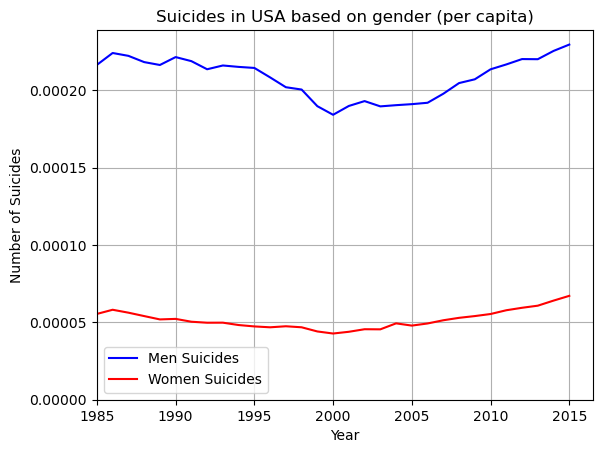

In [68]:
fig, ax = plt.subplots()
#test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
#testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()

sns.lineplot(x="year", y="percapita", data=test, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax,color='red',label='Women Suicides')

ax.set_title('Suicides in USA based on gender (per capita)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)

# Show the legend
ax.legend()
#plt.savefig('my_visualization.png')
plt.grid()

# Show the plot
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_18132\4173375605.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftest =dfSuicide.loc[dfSuicide['sex']==1].groupby('year').sum()
C:\Users\abdul\AppData\Local\Temp\ipykernel_18132\4173375605.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftestWomen =dfSuicide.loc[dfSuicide['sex']==2].groupby('year').sum()


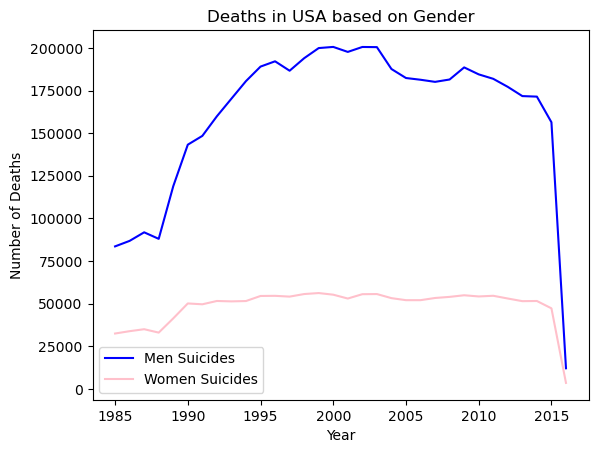

In [18]:
fig, ax = plt.subplots()
dftest =dfSuicide.loc[dfSuicide['sex']==1].groupby('year').sum()
dftestWomen =dfSuicide.loc[dfSuicide['sex']==2].groupby('year').sum()
sns.lineplot(x="year", y="suicides_no", data=dftest, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="suicides_no", data=dftestWomen,ax=ax,color='pink',label='Women Suicides')

ax.set_title('Deaths in USA based on Gender')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [67]:
dfSuicide['percapita'] = dfSuicide['suicides_no']/dfSuicide['population']
testWomen['percapita'] = testWomen['suicides_no']/testWomen['population']


In [45]:
dfSuicide.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,country-year,gdp_for_year,gdp_per_capita,generation,popNorma,percapita
0,Albania,1987,1,2,21,312900,6.71,Albania1987,"2,156,624,900",796,4,0.007137,0.000067
1,Albania,1987,1,4,16,308000,5.19,Albania1987,"2,156,624,900",796,2,0.007025,0.000052
2,Albania,1987,2,2,14,289700,4.83,Albania1987,"2,156,624,900",796,4,0.006607,0.000048
3,Albania,1987,1,6,1,21800,4.59,Albania1987,"2,156,624,900",796,1,0.000491,0.000046
4,Albania,1987,1,3,9,274300,3.28,Albania1987,"2,156,624,900",796,3,0.006256,0.000033


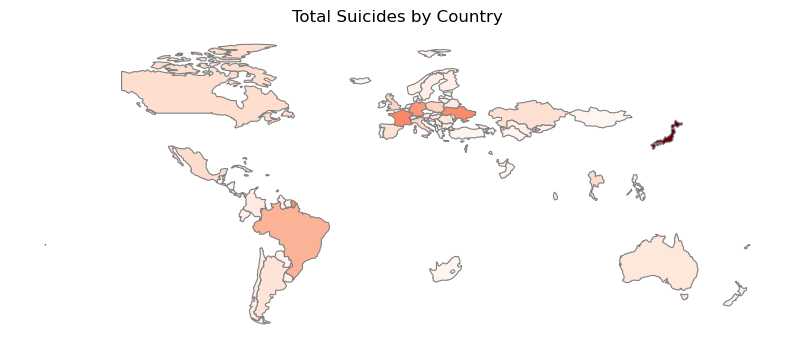

In [65]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by country and count the number of suicides in each country
suicides_by_country = dfSuicide.groupby('country')['suicides_no'].sum().reset_index()

# Merge the suicide count data with the world map data based on country names
map_data = world_map.merge(suicides_by_country, left_on='name', right_on='country')

# Plot the choropleth map using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
map_data.plot(column='suicides_no', cmap='Reds', linewidth=0.8, edgecolor='gray', ax=ax)
ax.axis('off')
ax.set_title('Total Suicides by Country')
plt.show()



In [49]:
suicides_by_country.head()

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101


In [58]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [59]:
data[data["country"].str.contains("Team 1") == False]

KeyError: "['Bosnia and Herzegovina'] not found in axis"